In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

In [2]:
targets = pd.read_csv("input/train.csv").target
train = pd.read_csv("input/train.csv").drop(['id','target'], axis=1)

In [3]:
train.head()

,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,nom_4,...,nom_8,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month
0,0,0,0,T,Y,Green,Triangle,Snake,Finland,Bassoon,...,c389000ab,2f4cb3d51,2,Grandmaster,Cold,h,D,kr,2,2
1,0,1,0,T,Y,Green,Trapezoid,Hamster,Russia,Piano,...,4cd920251,f83c56c21,1,Grandmaster,Hot,a,A,bF,7,8
2,0,0,0,F,Y,Blue,Trapezoid,Lion,Russia,Theremin,...,de9c9f684,ae6800dd0,1,Expert,Lava Hot,h,R,Jc,7,2
3,0,1,0,F,Y,Red,Trapezoid,Snake,Canada,Oboe,...,4ade6ab69,8270f0d71,1,Grandmaster,Boiling Hot,i,D,kW,2,1
4,0,0,0,F,N,Red,Trapezoid,Lion,Canada,Oboe,...,cb43ab175,b164b72a7,1,Grandmaster,Freezing,a,R,qP,7,8


In [4]:
for i in train.columns:
    print(i,len(train[i].value_counts()))

bin_0 2
bin_1 2
bin_2 2
bin_3 2
bin_4 2
nom_0 3
nom_1 6
nom_2 6
nom_3 6
nom_4 4
nom_5 222
nom_6 522
nom_7 1220
nom_8 2215
nom_9 11981
ord_0 3
ord_1 5
ord_2 6
ord_3 15
ord_4 26
ord_5 192
day 7
month 12


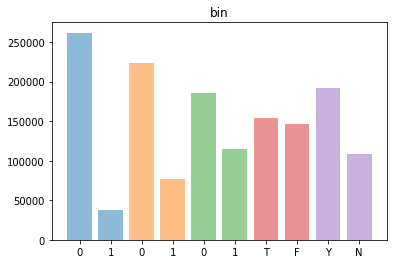

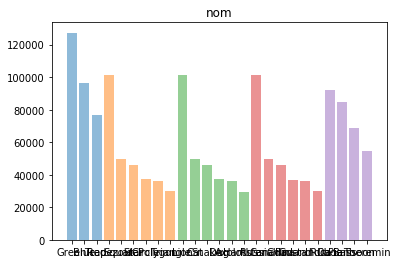

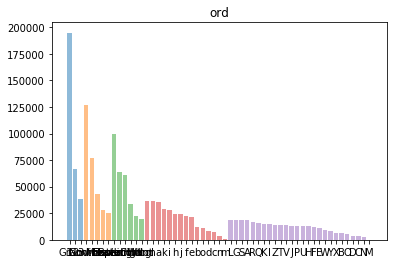

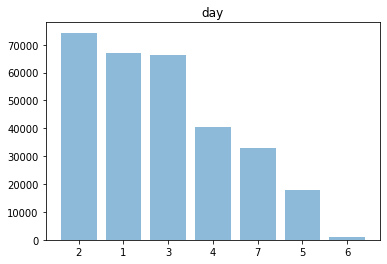

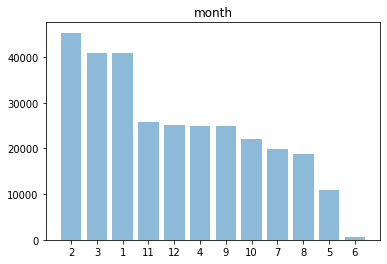

<Figure size 432x288 with 0 Axes>

In [5]:
col_ind = 0
curr_col = 0
curr_graph = 0
cols = []
heights = []
features = []
graphs = ['bin','nom','ord','day','month']
for group in [5,10,6,1,1]:
    features = []
    cols = []
    for i in range(group):
        col = train.columns[col_ind]
        if (len(train[col].value_counts().index) < 27):
            plt.bar([s + curr_col for s in range(len(train[col].value_counts().index))],train[col].value_counts().values, align='center', alpha=0.5)
            features += list(train[col].value_counts().index)
        col_ind += 1
        curr_col += len(train[col].value_counts().index)
    plt.title(graphs[curr_graph])
    plt.xticks([i for i in range(len(features))], features)
    plt.show()
    plt.clf()
    curr_graph += 1
    curr_col = 0
    
    

In [10]:
bins = ["bin_0","bin_1","bin_2","bin_3","bin_4"]
noms = ["nom_0","nom_1","nom_2","nom_3","nom_4","nom_5","nom_6","nom_7","nom_8","nom_9"]
ords = ["ord_0","ord_1","ord_2","ord_3","ord_4","ord_5"]
cycs = ["day","month"]
groups = [bins,noms,ords,cycs]


In [14]:
def heat(cols):
    labeled = []
    for col in cols:
        labeled.append(le.fit_transform(train[col].values))
    corr = pd.DataFrame(np.array(labeled).T).corr()

    # Generate a mask for the upper triangle
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    f, ax = plt.subplots(figsize=(11, 9))

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .5})    

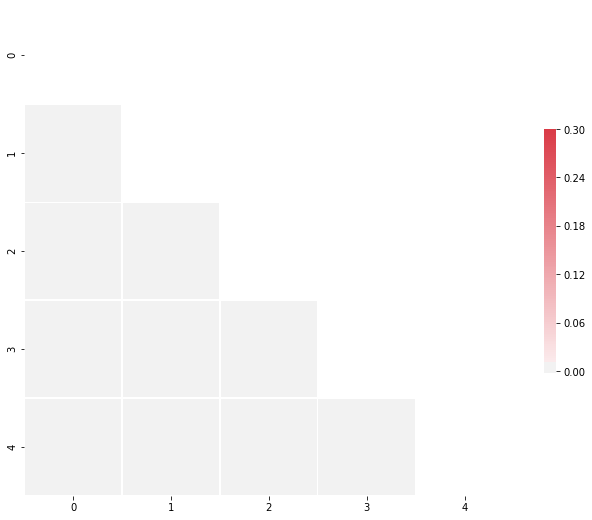

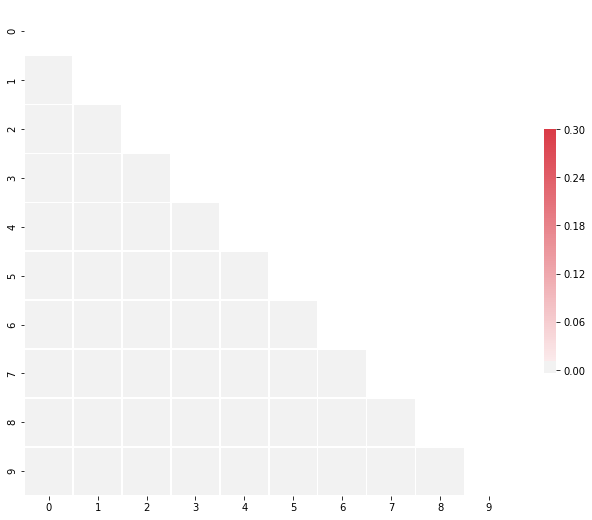

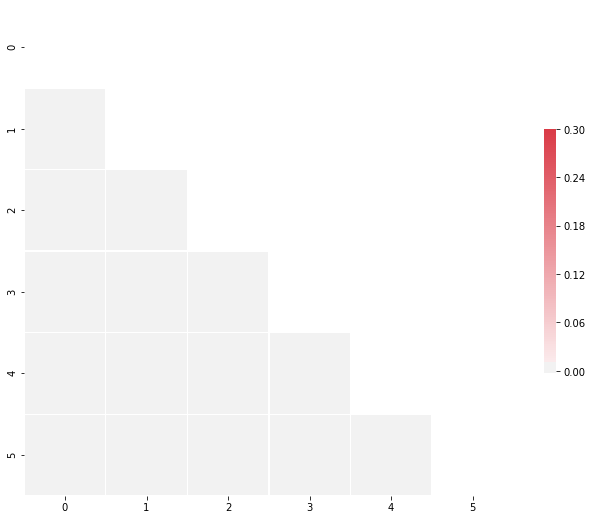

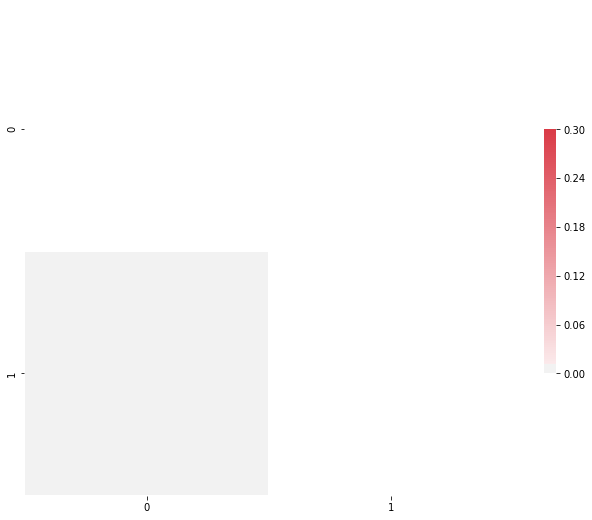

In [15]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
for group in groups:
    heat(group)

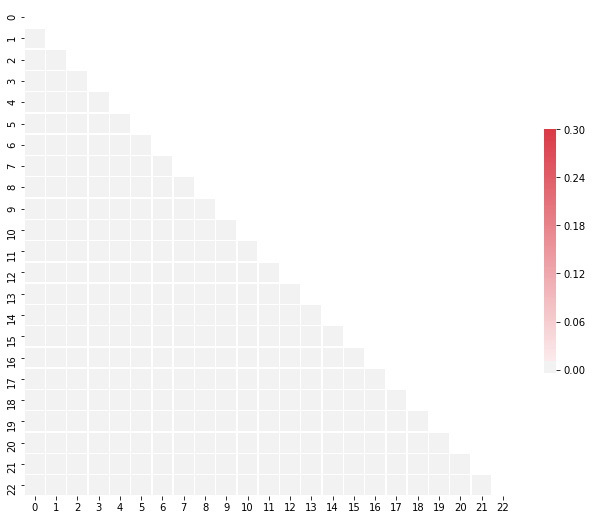

In [18]:
heat(train.columns)

(RangeIndex(start=0, stop=300000, step=1), array([2, 7, 7, ..., 7, 3, 1]))

In [41]:
np.arange(len(train['bin_0'].values)),train['bin_0'].values


(array([     0,      1,      2, ..., 299997, 299998, 299999]),
 array([0, 0, 0, ..., 0, 0, 0]))

In [27]:
heights, cols

([], [0, 1])

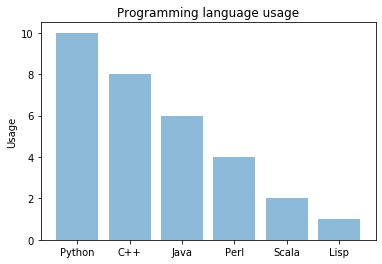

In [8]:
objects = ('Python', 'C++', 'Java', 'Perl', 'Scala', 'Lisp')
y_pos = np.arange(len(objects))
performance = [10,8,6,4,2,1]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Usage')
plt.title('Programming language usage')

plt.show()

In [ ]:
y_pos, performance

In [10]:
np.arange(len(train['bin_0'].values)),train['bin_0'].values

(array([     0,      1,      2, ..., 299997, 299998, 299999]),
 array([0, 0, 0, ..., 0, 0, 0]))